# Using simulations to explain uncertainty

From the blog of engineering.com

# Why Simulation is the Future of Uncertainty Evaluation

## Introduction

The conventional method for calculating uncertainty has significant limitations:

1. Only exact for measurements represented by simple linear equations
2. Only works when input uncertainties are normally distributed
3. Complex measurements lead to errors in uncertainty combination

This guide explains why simulation methods offer superior uncertainty evaluation.

## Simple Linear Models

Let's start with the simplest case: two influences adding to give a measurement result.

```{math}
y = a + b
```

For this linear combination:
- Increasing a by one unit increases y by one unit
- Independent of value of b
- All sensitivity coefficients equal one

The law of propagation of uncertainty gives:

```{math}
u^2(y) = u^2(a) + u^2(b)
```

### Distribution Effects

Even in this simple case, output distributions vary:

1. Two normal distributions:
   - Output is normal if inputs have similar size
   - Output deviates from normal if inputs differ significantly

2. Two uniform distributions:
   - Output is triangular if inputs have same size
   - Output is complex if inputs differ in size

3. Mixed distributions:
   - Combining normal and uniform gives complex distributions
   - Hard to predict without simulation

## How Simulation Works

Basic steps in measurement simulation:

1. Define measurement function:
```{math}
y = f(x)
```
where x is a vector of influence quantities

2. Generate random values:
   - Create vector r of m random draws
   - Use appropriate probability distributions
   - Scale by uncertainty values

3. Matrix formulation:
```{math}
X = x_0 + u \cdot r
```
where:
- X is m × n matrix of simulated values
- x₀ is vector of nominal values
- u is uncertainties
- r is random draws

4. Calculate results:
```{math}
Y = f(x)
```

5. Find confidence intervals:
```{math}
p = \frac{1-p}{2}
```
where p is proportion counted from each end

## Non-linear Measurements

### Example 1: Thermal Expansion

Measurement model:
```{math}
\Delta L = L \cdot \Delta T \cdot \alpha
```

First-order uncertainty approximation:
```{math}
u^2(\Delta L) = (\Delta T\alpha)^2u^2(L) + (L\alpha)^2u^2(\Delta T) + (L\Delta T)^2u^2(\alpha)
```

Third-order approximation adds terms:
```{math}
+ \Delta Tu^2(L)u^2(\alpha) + \alpha u^2(L)u^2(\Delta T) + Lu^2(\alpha)u^2(\Delta T) + u^2(\Delta T)u^2(L)u^2(\alpha)
```

### Example 2: Cosine Error

For a 200mm length measurement:
- Length uncertainty: 2 μm
- Alignment uncertainty: 1 degree

Results show:
- Non-normal distribution
- Significant differences between theory and simulation
- Larger differences at higher confidence levels

## Comparison of Methods

### Standard Uncertainty
- Similar results between theory and simulation
- First-order approximation often sufficient

### 95% Confidence Level
- Different confidence limit positions
- Similar total uncertainty range

### 99.9% Confidence Level
- Total range almost doubles
- Upper bound 3.5× theoretical prediction
- Differences increase with confidence level

## Best Practices for Simulation

1. Number of Trials
   - Use minimum of 1 million trials
   - More trials for higher confidence levels
   - Check convergence by increasing trials

2. Distribution Selection
   - Match actual measurement conditions
   - Consider all uncertainty sources
   - Document assumptions

3. Validation
   - Compare with analytical methods when possible
   - Check sensitivity to input parameters
   - Verify numerical stability

4. Documentation
   - Record all simulation parameters
   - Specify distributions used
   - State confidence levels

## Advantages of Simulation

1. No Distribution Assumptions
   - Works with any input distribution
   - Handles non-normal outputs
   - Better for high confidence levels

2. Non-linear Functions
   - No approximation needed
   - Captures all-order effects
   - More reliable for complex measurements

3. Practical Benefits
   - Easier to implement
   - More intuitive understanding
   - Better handling of asymmetric distributions

## When to Use Simulation

1. Always for:
   - High confidence levels (>95%)
   - Non-linear measurements
   - Mixed distributions
   - Complex measurement models

2. Consider for:
   - Quality-critical measurements
   - Safety-related calculations
   - Regulatory compliance

3. Maybe not for:
   - Simple linear measurements
   - Normal distributions only
   - Low confidence levels
   - Quick approximations

## Limitations and Considerations

1. Computational Resources
   - Large number of trials needed
   - May require significant processing time
   - Storage for large datasets

2. Expertise Required
   - Understanding of statistics
   - Programming knowledge
   - Validation methods

3. Validation
   - Check convergence
   - Verify input distributions
   - Compare with analytical methods

## Conclusion

Simulation offers significant advantages over traditional analytical methods for uncertainty evaluation:
1. More accurate for complex measurements
2. Better handling of different distributions
3. More reliable at high confidence levels
4. Future of uncertainty evaluation in quality engineering

Generating plots and results...


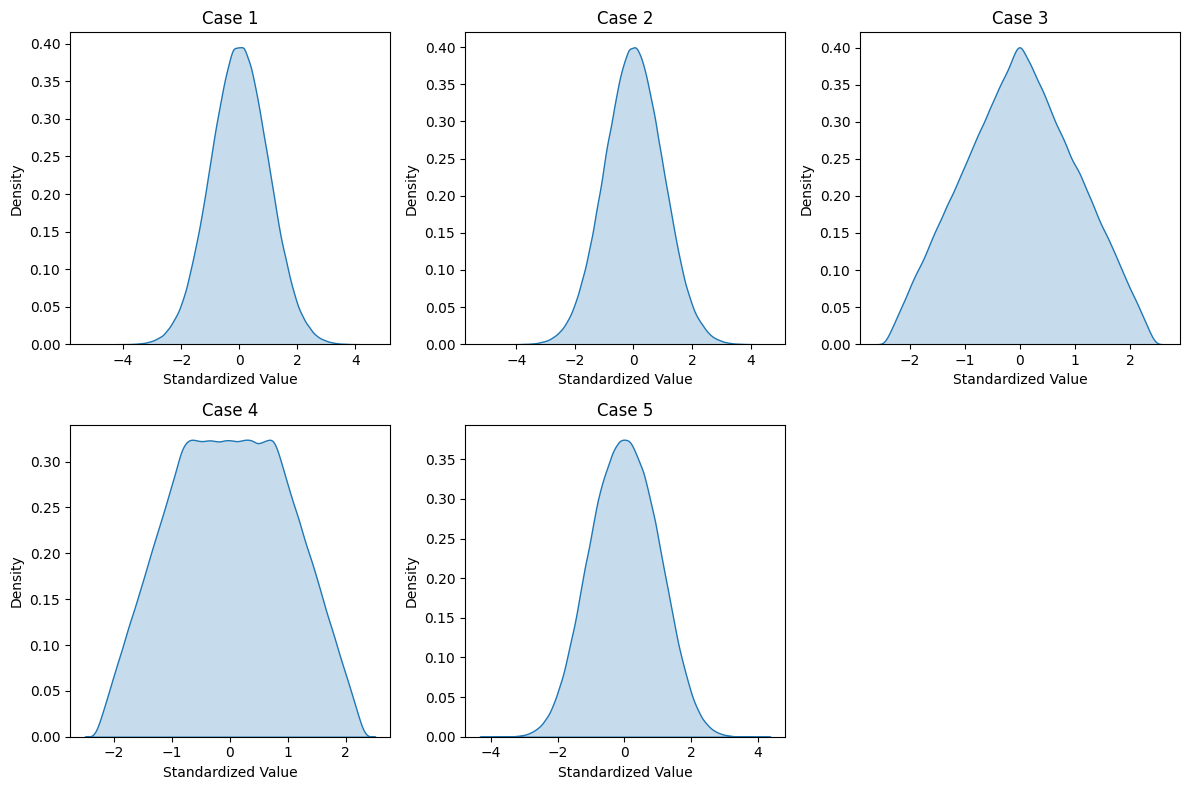


Thermal Expansion Results:
Standard Uncertainty: 0.000024 m


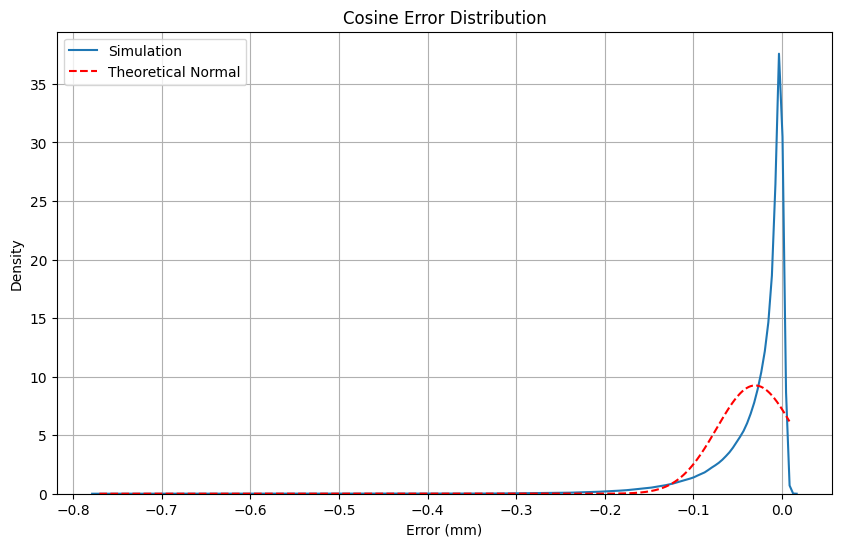


Uncertainty Comparison:
Standard Uncertainty: 0.043083 mm

68.3% Confidence Interval:
Lower: -0.060521 mm
Upper: -0.001550 mm

95.4% Confidence Interval:
Lower: -0.157121 mm
Upper: 0.001902 mm

99.7% Confidence Interval:
Lower: -0.308503 mm
Upper: 0.004422 mm


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

def simulate_linear_combination(n_trials=1_000_000, case=1):
    """
    Simulates different cases of combining uncertainties
    case 1: 2 normal distributions of similar size
    case 2: 2 normal distributions of different sizes
    case 3: 2 uniform distributions of same size
    case 4: 2 uniform distributions of different sizes
    case 5: normal and uniform distribution
    """
    np.random.seed(42)  # for reproducibility
    
    if case == 1:
        a = np.random.normal(0, 1, n_trials)
        b = np.random.normal(0, 1, n_trials)
    elif case == 2:
        a = np.random.normal(0, 1, n_trials)
        b = np.random.normal(0, 2, n_trials)
    elif case == 3:
        a = np.random.uniform(-np.sqrt(3), np.sqrt(3), n_trials)
        b = np.random.uniform(-np.sqrt(3), np.sqrt(3), n_trials)
    elif case == 4:
        a = np.random.uniform(-np.sqrt(3), np.sqrt(3), n_trials)
        b = np.random.uniform(-2*np.sqrt(3), 2*np.sqrt(3), n_trials)
    elif case == 5:
        a = np.random.normal(0, 1, n_trials)
        b = np.random.uniform(-np.sqrt(3), np.sqrt(3), n_trials)
    
    y = a + b
    return y

def plot_distributions():
    """Recreates Figure 1 from the paper"""
    plt.figure(figsize=(12, 8))
    cases = range(1, 6)
    
    for i, case in enumerate(cases, 1):
        y = simulate_linear_combination(case=i)
        
        # Normalize the data
        y = (y - np.mean(y)) / np.std(y)
        
        plt.subplot(2, 3, i)
        sns.kdeplot(y, fill=True)
        plt.title(f'Case {i}')
        plt.xlabel('Standardized Value')
        plt.ylabel('Density')
        
    plt.tight_layout()
    plt.show()

def thermal_expansion_simulation(n_trials=1_000_000):
    """
    Simulates thermal expansion measurement
    dL = L * dT * a
    """
    # Nominal values
    L = 1.0  # m
    dT = 2.3 # K
    a = 23e-6 # m/m/K
    
    # Uncertainties (5mm, 1K, 10%)
    u_L = 0.005
    u_dT = 1.0
    u_a = 0.1 * a
    
    # Generate random values
    L_sim = np.random.normal(L, u_L, n_trials)
    dT_sim = np.random.normal(dT, u_dT, n_trials)
    a_sim = np.random.normal(a, u_a, n_trials)
    
    # Calculate result
    dL = L_sim * dT_sim * a_sim
    
    return dL

def cosine_error_simulation(n_trials=1_000_000):
    """
    Simulates length measurement with cosine error
    L_measured = L_true * cos(theta)
    """
    # Nominal values and uncertainties
    L_true = 200  # mm
    u_L = 0.002  # mm
    u_theta = 1  # degree
    
    # Generate random values
    L_sim = np.random.normal(L_true, u_L, n_trials)
    theta_sim = np.random.normal(0, u_theta, n_trials)
    
    # Convert degrees to radians for calculation
    theta_sim_rad = np.deg2rad(theta_sim)
    
    # Calculate measured length with cosine error
    L_measured = L_sim * np.cos(theta_sim_rad)
    
    return L_measured - L_true  # Return the error

def calculate_uncertainties(data, confidence_levels=[0.683, 0.954, 0.997]):
    """Calculate standard and expanded uncertainties"""
    results = {}
    
    # Standard uncertainty
    results['std'] = np.std(data)
    
    # Expanded uncertainties
    for p in confidence_levels:
        lower = (1-p)/2
        upper = 1 - lower
        results[f'{p:.1%}'] = {
            'lower': np.quantile(data, lower),
            'upper': np.quantile(data, upper)
        }
    
    return results

def compare_distributions():
    """Recreates Figure 4 from the paper"""
    errors = cosine_error_simulation()
    
    plt.figure(figsize=(10, 6))
    
    # Plot simulation results
    sns.kdeplot(errors, label='Simulation')
    
    # Plot theoretical normal distribution
    x = np.linspace(min(errors), max(errors), 1000)
    plt.plot(x, stats.norm.pdf(x, np.mean(errors), np.std(errors)),
             'r--', label='Theoretical Normal')
    
    plt.title('Cosine Error Distribution')
    plt.xlabel('Error (mm)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

def print_uncertainty_comparison():
    """Prints uncertainty comparison table"""
    errors = cosine_error_simulation()
    uncertainties = calculate_uncertainties(errors)
    
    print("\nUncertainty Comparison:")
    print(f"Standard Uncertainty: {uncertainties['std']:.6f} mm")
    
    for level, values in uncertainties.items():
        if isinstance(values, dict):
            print(f"\n{level} Confidence Interval:")
            print(f"Lower: {values['lower']:.6f} mm")
            print(f"Upper: {values['upper']:.6f} mm")

if __name__ == "__main__":
    # Generate all figures and results
    print("Generating plots and results...")
    
    # Figure 1: Distribution comparisons
    plot_distributions()
    
    # Thermal expansion simulation
    dL = thermal_expansion_simulation()
    print("\nThermal Expansion Results:")
    print(f"Standard Uncertainty: {np.std(dL):.6f} m")
    
    # Cosine error distribution and uncertainties
    compare_distributions()
    print_uncertainty_comparison()